# LME mask for data extractions
Creating a multidimensional data array with boundaries for LMEs around the world.

## Importing relevant libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ldfierro\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Loading file with mask information
Masks created by Ryan Heneghan from QUT.

In [2]:
#Loading as dataset
mask = xr.open_dataset("../Data/Masks/fishMIP_regional_mask_ISIMIP3_v2.nc")

#Checking structure of dataset
mask

<xarray.Dataset>
Dimensions:       (lat: 180, lon: 360)
Coordinates:
  * lat           (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon           (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    fishMIP_MASK  (lat, lon) float32 ...
Attributes:
    author:        Created by Ryan Heneghan, with help from Simon Jennings <r...
    institution:   Queensland University of Technology
    date_created:  Mon Sep  6 16:43:41 2021
    comments:      Spatial mask for regional variable extraction. Coded as 1:...

The `comments` attribute seen above includes the key used when the mask was created. We will use this information to create a dictionary so we can create a multidimensional mask.

In [22]:
#Dictionary
#fishMIP_regional_mask_ISIMIP3.nc
# LME_keys = {1: "Humboldt", 2: "North Sea", 3: "Mediterranean", 4: "Baltic Sea", 5: "SE_Australia", 6: "East Bass Strait", \
#     7: "Cook Strait", 8: "Hawaiian long line", 9: "Benguela", 10: "EBS Shelf"}

#fishMIP_regional_mask_ISIMIP2a.nc and fishMIP_regional_mask_ISIMIP3_v2.nc
LME_keys = {1: "Humboldt", 2: "North Sea", 3: "Mediterranean", 4: "Baltic Sea", 5: "SE_Australia", 6: "East Bass Strait", \
    7: "Cook Strait", 8: "Hawaiian long line", 9: "Benguela", 10: "EBS Shelf", 11: "Chile", 12: "SW India", 13: "Kerguelen Plateau"}

#Check results
LME_keys

{1: 'Humboldt',
 2: 'North Sea',
 3: 'Mediterranean',
 4: 'Baltic Sea',
 5: 'SE_Australia',
 6: 'East Bass Strait',
 7: 'Cook Strait',
 8: 'Hawaiian long line',
 9: 'Benguela',
 10: 'EBS Shelf',
 11: 'Chile',
 12: 'SW India',
 13: 'Kerguelen Plateau'}

We will now plot the data to make sure the values in the attributes were correct.

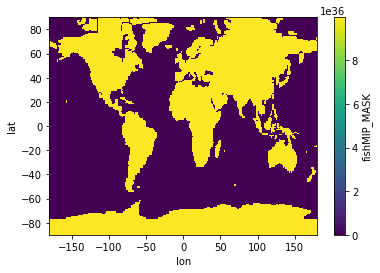

In [23]:
mask.fishMIP_MASK.plot()

The mask is using a `NO DATA` value instead of `NA`s to cover up land areas. We will change land areas to `NA`s before creating a multidimensional data array.

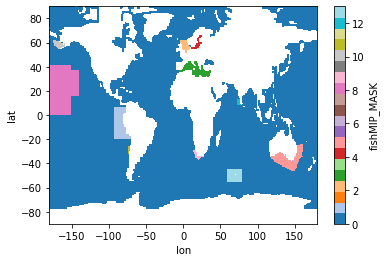

In [24]:
#Covering land areas
mask_no_land = xr.where(mask.fishMIP_MASK > 14, np.nan, mask.fishMIP_MASK)

#Plotting results
mask_no_land.plot(cmap = plt.cm.tab20)

We will now use the `LME_keys` dictionary to create our multidimensional mask.

In [25]:
#Create an empty dictionary
LME_mask = []

#Loop through each dictionary entry
for lme in LME_keys:
    #Getting name of LME
    name = LME_keys[lme]
    #Adding dimension with LME name
    LME_mask.append(xr.where(mask_no_land == lme, True, np.nan).expand_dims(LME_name = [name]))

#Creating multidimensional dataset
LME_mask = xr.concat(LME_mask, dim = 'LME_name')

#Check results
LME_mask

<xarray.DataArray 'fishMIP_MASK' (LME_name: 13, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * LME_name  (LME_name) object 'Humboldt' 'North Sea' ... 'Kerguelen Plateau'
  * lat       (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon       (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

We can now see that we have a new `coordinate` in our data array, which includes the names of the LMEs. We can now plot this multidimensional mask.

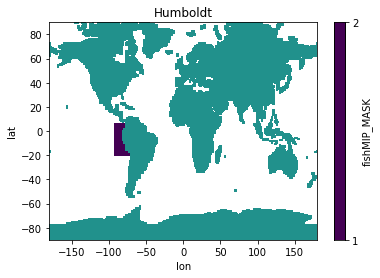

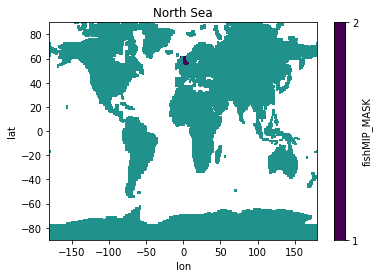

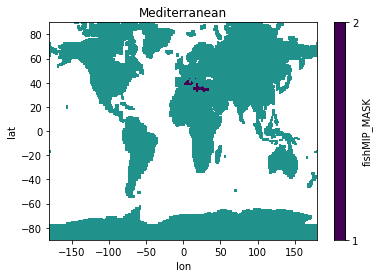

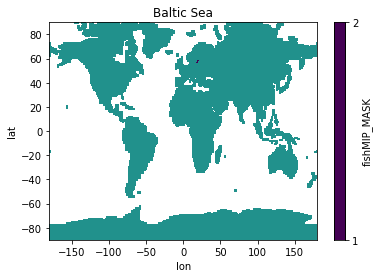

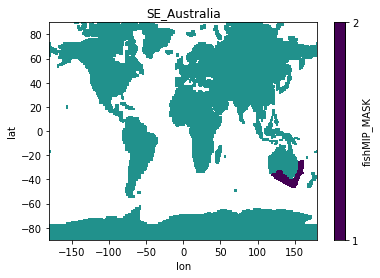

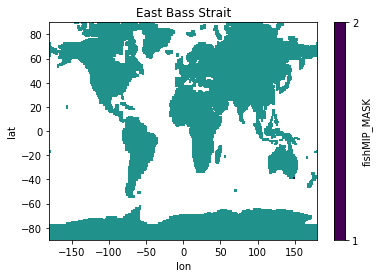

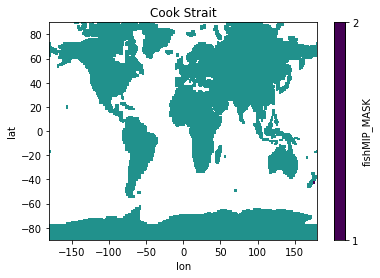

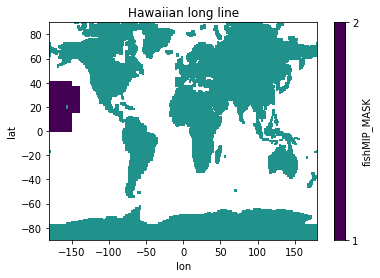

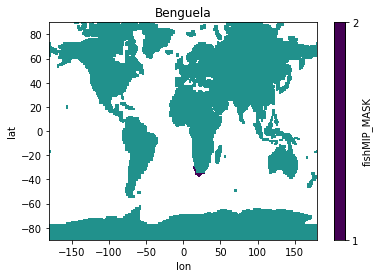

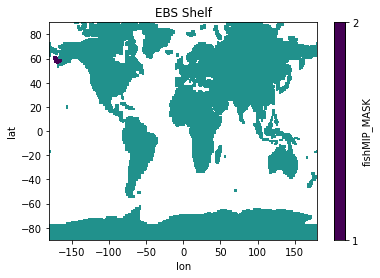

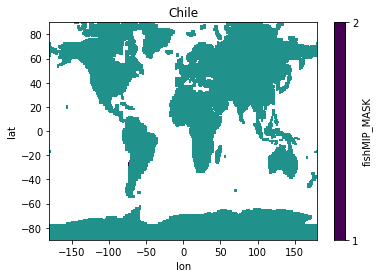

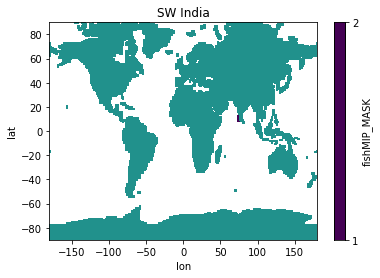

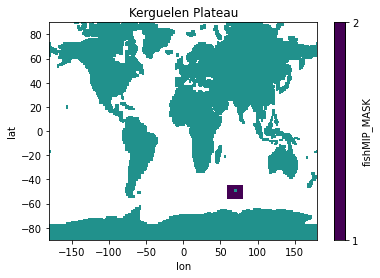

In [29]:
#Creating a mask for land areas and use it in the plots to show land areas
land = xr.where(mask.fishMIP_MASK > 14, 10, np.nan)

for lme in LME_keys:
    #Plotting results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    name = LME_keys[lme]

    LME_mask.sel(LME_name = name).plot(ax = ax, levels = [1, 2])
    land.plot(ax = ax, add_colorbar = False)
    plt.title(name)

## Saving the multidimensional mask to disk
We can now save this data array as a netcdf file into our machine for future use.

In [28]:
LME_mask.to_netcdf("../Data/Masks/fishMIP_regional_mask_ISIMIP3_v2_multi")